# Problem (case study)

#### The objective of this data is to understand customer demographics and buying behavior. We use predictive analytics to analyze the most profitable customers and how they interact. After that, we will take targeted actions to increase profitable customer response, retention, and growth.

# Getting Data

In [1]:
# First we import and take a look at the data

import pandas as pd

data = pd.read_csv('marketing_customer_analysis.csv')
data = data.drop(['Unnamed: 0'],axis=1)
data.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [2]:
# Show the dataframe shape

data.shape

(10910, 25)

# Cleaning/Wrangling/EDA

### Data Cleaning

In [3]:
# Standardize header names

data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [5]:
# make all headers lower case

cols = [column.lower() for column in data.columns]
data.columns = cols
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [6]:
# put a space between employment status

data = data.rename(columns={'employmentstatus':'employment status'})
data.head(2)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN


In [7]:
# Now we find the numerical columns

numcols = data._get_numeric_data().columns.tolist()
numcols

['customer lifetime value',
 'income',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'total claim amount']

In [8]:
# Now we find the categorical columns

catcols = data.select_dtypes('object').columns.tolist()
catcols

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employment status',
 'gender',
 'location code',
 'marital status',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'vehicle class',
 'vehicle size',
 'vehicle type']

In [9]:
# Check and deal with NaN values

data.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [10]:
# For the state column we check the number of NaN values

data['state'].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: state, dtype: int64

In [11]:
# The NaN values have the least count so we fill them in with the 'mode' state

data['state'] = data['state'].fillna('California')
data['state'].value_counts(dropna=False)

California    4183
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [12]:
# We now view the response column and check for NaN values

data['response'].value_counts(dropna=False)

No     8813
Yes    1466
NaN     631
Name: response, dtype: int64

In [13]:
# As the most responses fall into the 'No' category by a huge amount, we fill NaN values with 'No'

data['response'] = data['response'].fillna('No')
data['response'].value_counts(dropna=False)

No     9444
Yes    1466
Name: response, dtype: int64

In [14]:
# Next we check the 'months since last claim' column for NaN values

data['months since last claim'].value_counts(dropna=False)

NaN     633
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
19.0    276
23.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: months since last claim, dtype: int64

In [15]:
# As we can see there are a lot of NaN values so we fill them with the median value

import numpy as np

med_mslc = data['months since last claim'].median()
data['months since last claim'] = data['months since last claim'].fillna(med_mslc)
print(med_mslc)
data['months since last claim'].value_counts(dropna=False)

14.0


14.0    932
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
9.0     277
23.0    276
19.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: months since last claim, dtype: int64

In [16]:
# Next we check NaN values for number of open complaints

data['number of open complaints'].value_counts(dropna=False)

0.0    8160
1.0    1145
NaN     633
2.0     414
3.0     324
4.0     166
5.0      68
Name: number of open complaints, dtype: int64

In [17]:
# We fill in the NaN values with the median value 0, this is also the mode as we can see above

med_nooc = data['number of open complaints'].median()
data['number of open complaints'] = data['number of open complaints'].fillna(med_nooc)
print(med_nooc)
data['number of open complaints'].value_counts(dropna=False)

0.0


0.0    8793
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: number of open complaints, dtype: int64

In [18]:
# We check the NaN values for vehicle class

data['vehicle class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [19]:
# We fill in the NaN values with the mode class

data['vehicle class'] = data['vehicle class'].fillna('Four-Door Car')
data['vehicle class'].value_counts(dropna=False)

Four-Door Car    5834
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [20]:
# We check the NaN values for vehicle size

data['vehicle size'].value_counts(dropna=False)

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: vehicle size, dtype: int64

In [21]:
# We fill in the NaN values with the mode size

data['vehicle size'] = data['vehicle size'].fillna('Medsize')
data['vehicle size'].value_counts(dropna=False)

Medsize    7873
Small      1966
Large      1071
Name: vehicle size, dtype: int64

In [22]:
# Next we check the NaN values for vehicle type

data['vehicle type'].value_counts(dropna=False)

NaN    5482
A      5428
Name: vehicle type, dtype: int64

In [23]:
# We fill in the NaN values with M which stands for Manual, in the case that A is automatic

data['vehicle type'] = data['vehicle type'].fillna('M')
data['vehicle type'].value_counts(dropna=False)

M    5482
A    5428
Name: vehicle type, dtype: int64

In [24]:
# Datetime format - Extract the months from the dataset and store in a separate column

data['effective to date'] = pd.to_datetime(data['effective to date'], errors='coerce')
data['month'] = pd.DatetimeIndex(data['effective to date']).month
data['month'].unique()

array([2, 1])

In [25]:
# Filter the data to show only the information for the first quarter

filtered = data[data['month']<4]
display(filtered)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


### Exploratory Data Analysis

##### Start of Round 3 - Lets Explore our dataframe

In [26]:
# Show DataFrame info

display(data)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [27]:
# show data types of our DataFrame

data.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment status                        object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [28]:
# Describe the DataFrame

data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.082401,48.091934,0.361962,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,9.787208,27.940675,0.890134,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [29]:
# Let's import needed libaries 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [30]:
# Here we count the total number of responses in the response column

num_response = data['response'].value_counts()
num_response

No     9444
Yes    1466
Name: response, dtype: int64

<AxesSubplot:title={'center':'total number of responses'}>

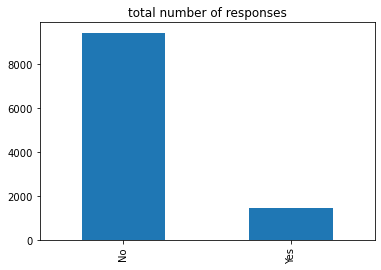

In [31]:
# We show a plot of the amount of responses

num_response.plot(title='total number of responses' , kind='bar')

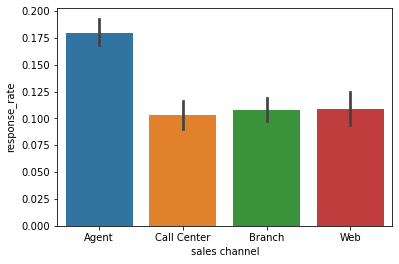

In [32]:
# Next we show a plot of the response rate by the sales channel
# To do this we make a new column called "response_rate" that replaces Yes with 1 and No with 0

data['response_rate'] = np.where(data['response']=='Yes',1, 0)

# We then create a barplot using the response_rate column and sales channel column

sns.barplot(x="sales channel", y="response_rate", data=data)
plt.show()

<AxesSubplot:xlabel='total claim range', ylabel='response_rate'>

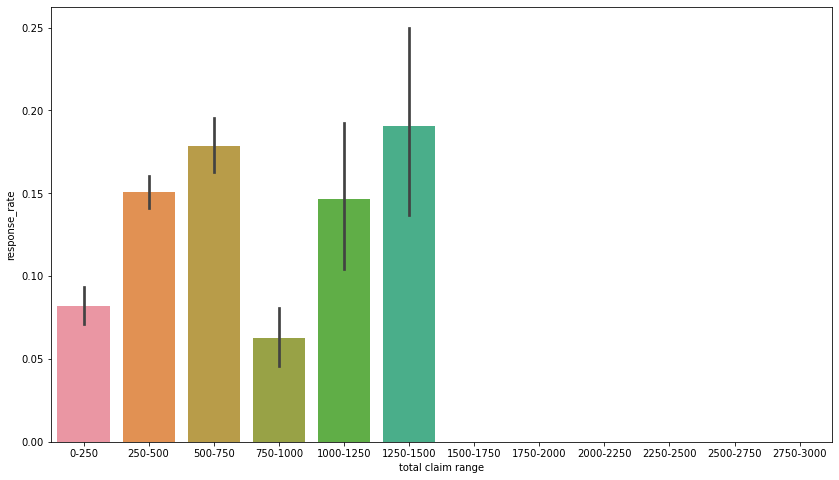

In [33]:
# Show a plot of the response rate by the total claim amount (https://stackoverflow.com/questions/62963174/make-bar-chart-with-binned-x-values-python)

# Here we make a new column called total claim range that puts ranges from 0 - 3000 (min-max) into bins
data['total claim range'] = pd.cut(data['total claim amount'], bins=range(0,3001,250), labels=[f'{l}-{l+250}' for l in range(0,3000,250)])

# We plot the graph with the new column
fig,ax = plt.subplots(figsize=(14,8))
sns.barplot(x='total claim range', y='response_rate', data=data)


<AxesSubplot:xlabel='income range', ylabel='response_rate'>

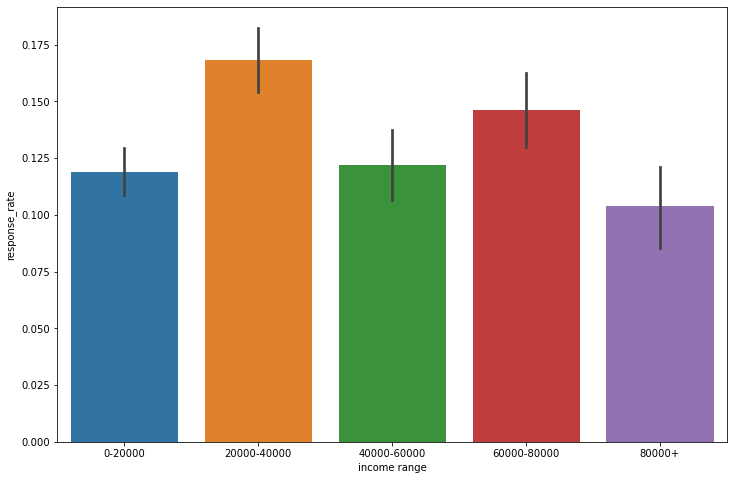

In [34]:
# Next we show a plot of the response rate by income

# First we make our labels of different ranges, from min to max
label = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+']

# Next we make a new column called income range that divides the differen ranges into bins
data['income range'] = pd.cut(data['income'], bins=5, labels=label)

# Then we plot the graph
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x='income range', y='response_rate', data=data)


##### Start of Round 4 - Lets Explore our data further

In [35]:
# We check the data types of the columns

data.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment status                        object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [36]:
# We store the numeric and categorical data into separate dataframes

numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = object)

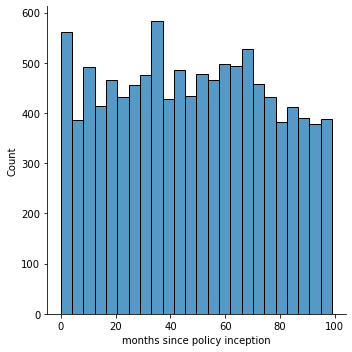

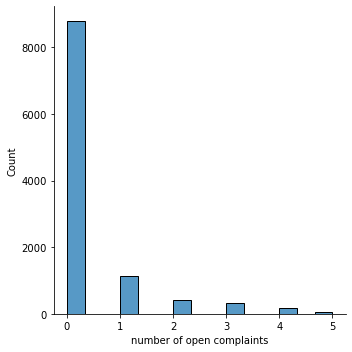

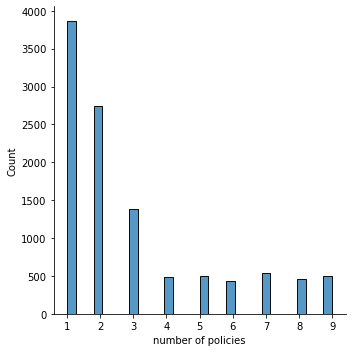

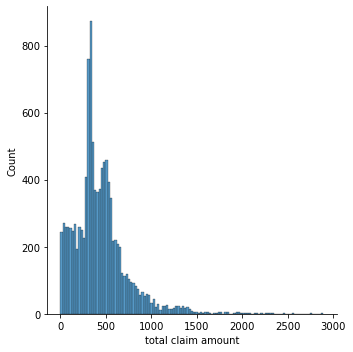

In [38]:
# Now we will try to check the normality of the numerical variables visually

# Use seaborn library to construct distribution plots for the numerical variables

sns.displot(numerical['months since policy inception'])
sns.displot(numerical['number of open complaints'])
sns.displot(numerical['number of policies'])
sns.displot(numerical['total claim amount'])

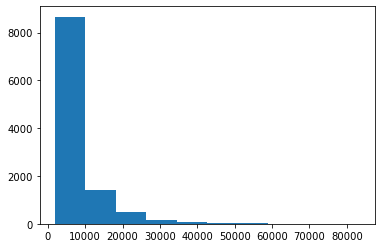

In [39]:
# Use Matplotlib to construct histograms

# We plot a graph for customer lifetime value
plt.hist(numerical['customer lifetime value'])
plt.show()

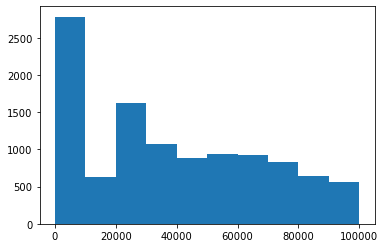

In [40]:
# We plot a graph for income

plt.hist(numerical['income'])
plt.show()

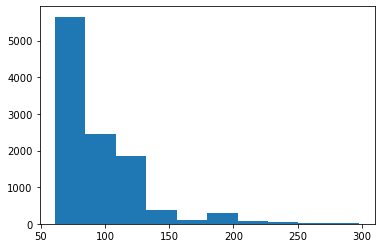

In [41]:
# We plot a graph for monthly premium auto

plt.hist(numerical['monthly premium auto'])
plt.show()

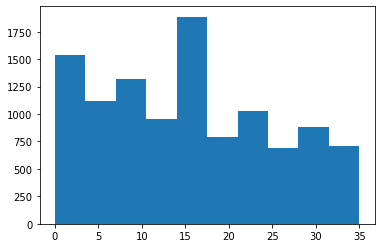

In [42]:
# We plot a graph for months since last claim

plt.hist(numerical['months since last claim'])
plt.show()

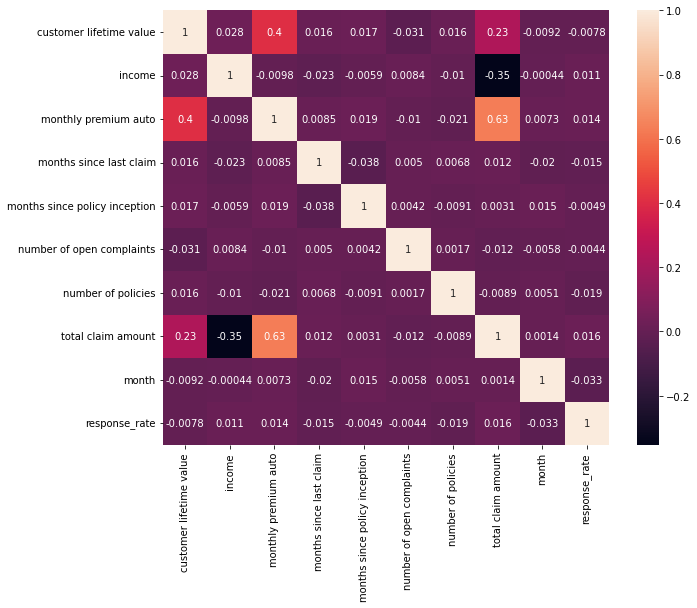

In [43]:
# For the numerical variables, we check the multicollinearity between the features

# First we create a correlation matrix
correlations_matrix = numerical.corr()

# Then we get a visual representation of the matrix using a Seaborn Heatmap
sns.heatmap(correlations_matrix, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,8))
plt.show()

In [44]:
# correlation matrix table

correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response_rate
customer lifetime value,1.000000,0.028306,0.403069,0.015874,0.016960,-0.030616,0.016024,0.232626,-0.009234,-0.007765
income,0.028306,1.000000,-0.009788,-0.022708,-0.005903,0.008425,-0.009960,-0.354141,-0.000443,0.011156
monthly premium auto,0.403069,-0.009788,1.000000,0.008489,0.018953,-0.010059,-0.020505,0.631799,0.007253,0.013918
months since last claim,0.015874,-0.022708,0.008489,1.000000,-0.038157,0.005004,0.006807,0.012340,-0.019666,-0.015016
months since policy inception,0.016960,-0.005903,0.018953,-0.038157,1.000000,0.004165,-0.009123,0.003095,0.015163,-0.004875
number of open complaints,-0.030616,0.008425,-0.010059,0.005004,0.004165,1.000000,0.001681,-0.012380,-0.005802,-0.004419
number of policies,0.016024,-0.009960,-0.020505,0.006807,-0.009123,0.001681,1.000000,-0.008923,0.005127,-0.018650
total claim amount,0.232626,-0.354141,0.631799,0.012340,0.003095,-0.012380,-0.008923,1.000000,0.001425,0.016416
month,-0.009234,-0.000443,0.007253,-0.019666,0.015163,-0.005802,0.005127,0.001425,1.000000,-0.032981
response_rate,-0.007765,0.011156,0.013918,-0.015016,-0.004875,-0.004419,-0.018650,0.016416,-0.032981,1.000000


# Processing Data

##### Start of Round 5 - Processing our data

In [45]:
# We import the necessary libraries

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

# Now we separate the features from the labels, total_claim_amount is the target variable
# We do the X-y split

y = numerical['total claim amount']
X = numerical.drop(['total claim amount'], axis=1)


In [46]:
# We use Min Max Scaler to normalize our numerical data (make data range from 0 - 1)

transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
norm_data = pd.DataFrame(x_normalized, columns=X.columns)
norm_data

(10910, 9)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,response_rate
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0
4,0.087527,0.236795,0.236287,0.400000,0.313131,0.0,0.750,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.400000,0.404040,0.0,0.750,0.0,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0,0.0


##### Start of Round 6 - We continue processing our data

In [47]:
# We import the necessary libraries

import math
from sklearn import linear_model

# Now we start processing the categorical data
# First we drop the customer column as it is not needed for our analysis

categorical = categorical.drop(['customer'],axis=1)
categorical.head()

,state,response,coverage,education,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,M


In [48]:
# Next we use one hot encoding to turn categorical variables into multiple numerical columns

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categorical)
print(encoder.categories_)
encoded = encoder.transform(categorical).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded)
onehot_encoded.head(20)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
8,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [49]:
# Next we concat the two DataFrames
# We do this by merging the normalized numerical data with the encoded categories

X = pd.concat([norm_data, onehot_encoded], axis=1)  
X.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,response_rate,0,...,34,35,36,37,38,39,40,41,42,43
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.087527,0.236795,0.236287,0.400000,0.313131,0.0,0.750,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [50]:
# Lets take a look at the target variable

y = data['total claim amount']
y.head()

0    292.800000
1    744.924331
2    480.000000
3    484.013411
4    707.925645
Name: total claim amount, dtype: float64

# Modeling

In [51]:
# First we start with the train-test split

# We split the data into train set and test set with 80% training set and 20% testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
# show training and testing shape

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 53)
(2182, 53)
(8728,)
(2182,)


In [53]:
# Our training data

X_train.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,response_rate,0,...,34,35,36,37,38,39,40,41,42,43
6371,0.049708,0.656145,0.050633,0.314286,0.141414,0.0,0.250,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4547,0.038861,0.000000,0.046414,0.628571,0.585859,0.0,0.500,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6012,0.087773,0.525820,0.219409,0.857143,0.222222,0.0,0.250,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3535,0.089254,0.538022,0.227848,0.028571,0.080808,0.2,0.875,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6423,0.010089,0.140327,0.046414,0.314286,0.030303,0.0,0.000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [54]:
y_train.head()

6371     61.570877
4547    345.600000
6012    441.623031
3535    552.000000
6423    345.600000
Name: total claim amount, dtype: float64

In [55]:
# Now we apply linear regression

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [56]:
# Data is trained and the r2 score is given

from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7696616752665825

In [57]:
# Data is tested in the test portion of the data not used for training and the r2 score is given

predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7744921562590764

In [58]:
# The target predictions are displayed 

predictions_test[:5]

array([491.65500578, 533.08512052, 824.11344084, 328.0831674 ,
       570.96500334])

In [59]:
# The actual target amounts are displayed

y_test[:5]

125      558.099357
10507    326.400000
1202     900.000000
4764     292.800000
9064     518.400000
Name: total claim amount, dtype: float64

# Model Validation

In [60]:
# Now lets validate our model. We import the necessary libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# We calculate the mean squared error 

mse=mean_squared_error(y_test,predictions_test)
mse

19815.72561361851

In [61]:
# We calculate the root of the mean squared error  

rmse = np.sqrt(mse)
rmse

140.76834023891348

In [62]:
# We calculate the mean absolute error 

mae = mean_absolute_error(y_test, predictions_test)
print(mae)

96.94111082694563


In [63]:
# We calculate the r2 test score

r2 = r2_score(y_test, predictions_test)
r2

0.7744921562590764

##### Start of Round 7 - Lets try and improve our model

In [64]:
# Lets use a different scaler to see if we can get better results

# Reset the value of X

X = numerical.drop(['total claim amount'], axis=1)

# This time we use the Standard Scaler to get standardized data (make data distributed with mean=0 and std=1)

transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)
print(x_standardized.shape)
norm_data = pd.DataFrame(x_standardized, columns=X.columns)
norm_data

(10910, 9)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,response_rate
0,-0.466105,0.345635,-0.934819,-0.825851,0.139877,-0.406656,2.509455,1.068914,-0.393993
1,-0.840946,-1.236462,-0.847713,-1.234566,-0.790709,-0.406656,-0.824922,-0.935529,-0.393993
2,1.006523,-0.507194,0.197554,1.932979,-0.611750,-0.406656,-0.408125,1.068914,-0.393993
3,2.079112,0.380189,0.110448,-0.519314,-1.613919,-0.406656,-0.408125,-0.935529,2.538113
4,0.146240,-0.456597,0.691152,-0.110599,-0.611750,-0.406656,1.675860,-0.935529,-0.393993
...,...,...,...,...,...,...,...,...,...
10905,1.095916,-1.236462,4.639940,-0.110599,-0.289625,-0.406656,1.675860,-0.935529,-0.393993
10906,-0.400710,0.777715,-0.818678,-0.825851,0.712545,-0.406656,1.259063,-0.935529,-0.393993
10907,2.305825,0.075787,3.130109,-0.417135,0.533586,-0.406656,-0.408125,1.068914,-0.393993
10908,0.574273,0.878150,1.881595,-1.541103,-0.754917,4.087257,1.259063,1.068914,-0.393993


In [65]:
# Next we concat the DataFrames again and merge standardized data to encoded categories

X = pd.concat([norm_data, onehot_encoded], axis=1)  

# We have our X variable

X.head(5)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,response_rate,0,...,34,35,36,37,38,39,40,41,42,43
0,-0.466105,0.345635,-0.934819,-0.825851,0.139877,-0.406656,2.509455,1.068914,-0.393993,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.840946,-1.236462,-0.847713,-1.234566,-0.790709,-0.406656,-0.824922,-0.935529,-0.393993,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.006523,-0.507194,0.197554,1.932979,-0.611750,-0.406656,-0.408125,1.068914,-0.393993,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2.079112,0.380189,0.110448,-0.519314,-1.613919,-0.406656,-0.408125,-0.935529,2.538113,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.146240,-0.456597,0.691152,-0.110599,-0.611750,-0.406656,1.675860,-0.935529,-0.393993,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [66]:
# We have our y variable

y = data['total claim amount']
y.head()

0    292.800000
1    744.924331
2    480.000000
3    484.013411
4    707.925645
Name: total claim amount, dtype: float64

In [83]:
# We redo the train-test split with different test size of 75% training data and 25% testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8182, 53)
(2728, 53)
(8182,)
(2728,)


In [84]:
# We apply linear regression and perform training

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7674222629786118

In [85]:
# Applying the model on the testing set

predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7803125859687843

In [86]:
# We do another model validation and calculate the mean squared error

mse=mean_squared_error(y_test,predictions_test)
mse

18205.730226768475

In [87]:
# We calculate the root of the mean squared error  

rmse = np.sqrt(mse)
rmse

134.92861159431115

In [88]:
# We calculate the mean absolute error 

mae = mean_absolute_error(y_test, predictions_test)
print(mae)

95.0462940859107


In [90]:
# The new target predictions are displayed 

y_test[:5]

554     295.871784
5211    498.779439
8474     99.509191
3185    292.800000
2845    389.185006
Name: total claim amount, dtype: float64

In [89]:
# Lets compare with the actual target amounts displayed
predictions_test[:5]

array([249.32582125, 605.09721871, 109.25580289, 316.92341685,
       391.24096322])

#  Reporting

The first implemented model (1) had a training score of 0.7696616752665825 and a testing score of 0.7744921562590764. The mean squared error was 19815.72561361851 and mean absolute error was 96.94111082694563.

The second implemented model (2) had a training score of 0.7674222629786118 and a testing score of 0.7803125859687843. The mean squared error was 18205.730226768475 and mean absolute error was 95.0462940859107.

As we can see in these two models, there was no significance difference in results. Model 2 had a slightly smaller mse of 18205 to model 1's 19815. 

The differences in the two models were that in Model 2 a standard scaler was used, compared to the min max scaler used in Model 1. Also in model 1 my test size was 0.2 while in model 2 it was 0.25.